# German Credit - 02 - Import

## Setup

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yaml

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# pd.set_option('display.max_rows', None)

sns.set_style("darkgrid")

from IPython.display import display, Markdown
from pprint import pprint 

DEBUG = True
SEED = 666

In [152]:
DATASET = "German Credit"

import os, sys
COLAB = 'google.colab' in sys.modules
ROOT = "./"

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)


def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Datasets

In [153]:
for filename in ["german.data", "german.doc", "german.data-numeric"]:
    source = f"https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/{filename}"
    target = f"{ROOT}/orig/{filename}"
    if not os.path.isfile(target):
        print (f"Downloading remote file {filename}", sep="")
        import urllib.request
        urllib.request.urlretrieve(source, target)
    else:
        print(f"Using local copy of {filename}")

Using local copy of german.data
Using local copy of german.doc
Using local copy of german.data-numeric


In [154]:
df = pd.read_pickle(f"{ROOT}/data/labeled.pkl")
print(df.shape)
df.head(20)

(1000, 21)


,Account_Balance,Loan_Duration,Credit_History,Loan_Purpose,Loan_Amount,Savings,Years_Employed,Installment_Rate,Gender_and_Status,Other_Debtors_Guarantors,Year_of_Residence,Property,Age,Installment_Plans,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign,Credit_Rating
0,(A11) ... < 0 DM,6,(A34) critical account/,(A43) radio/television,1169,(A65) unknown/ no savings account,(A75) .. >= 7 years,4,(A93) male : single,(A101) none,4,(A121) real estate,67,(A143) none,(A152) own,2,(A173) skilled employee / official,1,"(A192) yes, registered under the customers name",(A201) yes,1
1,(A12) 0 <= ... < 200 DM,48,(A32) existing credits paid back duly till now,(A43) radio/television,5951,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,2,(A92) female : divorced/separated/married,(A101) none,2,(A121) real estate,22,(A143) none,(A152) own,1,(A173) skilled employee / official,1,(A191) none,(A201) yes,2
2,(A14) no checking account,12,(A34) critical account/,(A46) education,2096,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,2,(A93) male : single,(A101) none,3,(A121) real estate,49,(A143) none,(A152) own,1,(A172) unskilled - resident,2,(A191) none,(A201) yes,1
3,(A11) ... < 0 DM,42,(A32) existing credits paid back duly till now,(A42) furniture/equipment,7882,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,2,(A93) male : single,(A103) guarantor,4,(A122) if not A121 : building society savings ...,45,(A143) none,(A153) for free,1,(A173) skilled employee / official,2,(A191) none,(A201) yes,1
4,(A11) ... < 0 DM,24,(A33) delay in paying off in the past,(A40) car (new),4870,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,3,(A93) male : single,(A101) none,4,(A124) unknown / no property,53,(A143) none,(A153) for free,2,(A173) skilled employee / official,2,(A191) none,(A201) yes,2
5,(A14) no checking account,36,(A32) existing credits paid back duly till now,(A46) education,9055,(A65) unknown/ no savings account,(A73) 1 <= ... < 4 years,2,(A93) male : single,(A101) none,4,(A124) unknown / no property,35,(A143) none,(A153) for free,1,(A172) unskilled - resident,2,"(A192) yes, registered under the customers name",(A201) yes,1
6,(A14) no checking account,24,(A32) existing credits paid back duly till now,(A42) furniture/equipment,2835,(A63) 500 <= ... < 1000 DM,(A75) .. >= 7 years,3,(A93) male : single,(A101) none,4,(A122) if not A121 : building society savings ...,53,(A143) none,(A152) own,1,(A173) skilled employee / official,1,(A191) none,(A201) yes,1
7,(A12) 0 <= ... < 200 DM,36,(A32) existing credits paid back duly till now,(A41) car (used),6948,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,2,(A93) male : single,(A101) none,2,"(A123) if not A121/A122 : car or other, not in...",35,(A143) none,(A151) rent,1,(A174) management/ self-employed/,1,"(A192) yes, registered under the customers name",(A201) yes,1
8,(A14) no checking account,12,(A32) existing credits paid back duly till now,(A43) radio/television,3059,(A64) .. >= 1000 DM,(A74) 4 <= ... < 7 years,2,(A91) male : divorced/separated,(A101) none,4,(A121) real estate,61,(A143) none,(A152) own,1,(A172) unskilled - resident,1,(A191) none,(A201) yes,1
9,(A12) 0 <= ... < 200 DM,30,(A34) critical account/,(A40) car (new),5234,(A61) ... < 100 DM,(A71) unemployed,4,(A94) male : married/widowed,(A101) none,2,"(A123) if not A121/A122 : car or other, not in...",28,(A143) none,(A152) own,2,(A174) management/ self-employed/,1,(A191) none,(A201) yes,2


## Quiz

# Q1: 
what is the total of `Loan_Amount`?

In [155]:
df['Loan_Amount'].sum()

3271258

# Q2:
What is the mean `Loan_Duration` to 2DP?

In [156]:
df['Loan_Duration'].mean()

20.903

# Q3:
What is the standard deviation of `Loan_Amount` (to 2DP)?

In [157]:
df['Loan_Amount'].std()

2822.73687596044

# Q4:
What is the mean `Loan_Amount` for applications that have `Year_of_Residence` equal to `1` (answer to 2DP)?

In [158]:
df[df['Year_of_Residence']==1]['Loan_Amount'].mean()

2926.776923076923

# Q5:
What is the range of `Loan_Amount`?

In [159]:
df['Loan_Amount'].max() - df['Loan_Amount'].min()

18174

# Q6:
Classify the `Age` distribution as:

a) Left Skewed
b) Symmetric
c) Right Skewed

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

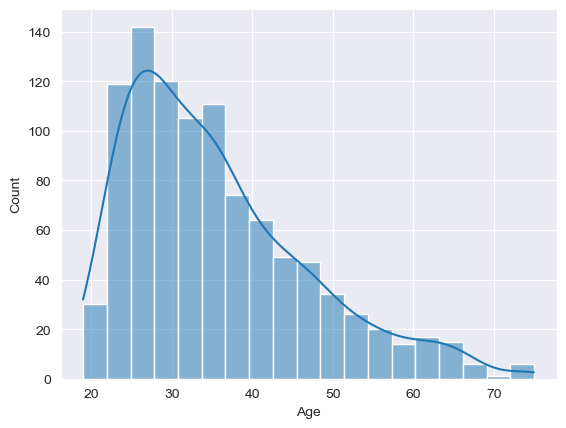

In [160]:
sns.histplot(data=df, x='Age', kde=True)

# Q7:

What is the interquartile range (IQR) of `Loan_Amount` (to 2DP)?

In [161]:
upper = df['Loan_Amount'].quantile(0.75)
lower = df['Loan_Amount'].quantile(0.25)
upper - lower

2606.75

# Q8:

Using the 1.5*IQR from the quartiles rule, how many outlier observations are in `Loan_Amount`?

In [162]:
upper = df['Loan_Amount'].quantile(0.75)
lower = df['Loan_Amount'].quantile(0.25)
iqr = upper - lower
upper = upper + 1.5*iqr
lower = lower - 1.5*iqr
df[(df['Loan_Amount']<lower) | (df['Loan_Amount']>upper)].shape[0]

72

# Q9:

What is the third most popular reason cited for loan?

In [163]:
df['Loan_Purpose'].value_counts().index[2]

'(A42) furniture/equipment'

# Q10:

How many distinct reasons are cited for asking for a loan?

In [164]:
df['Loan_Purpose'].nunique()

10

# Q11:
Which reason cited for loan has the highest rate of bad claims?

In [165]:
df.groupby("Loan_Purpose")["Credit_Rating"].mean().sort_values(ascending=False).index[0]

C:\Users\micha\AppData\Local\Temp\ipykernel_27720\3673923373.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Loan_Purpose")["Credit_Rating"].mean().sort_values(ascending=False).index[0]


'(A46) education'

# Q12:

Which `Credit_History` has the lowest rate of bad claims?

In [166]:
df.groupby('Credit_History')['Credit_Rating'].mean().sort_values(ascending=True).index[0]

C:\Users\micha\AppData\Local\Temp\ipykernel_27720\3852586029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Credit_History')['Credit_Rating'].mean().sort_values(ascending=True).index[0]


'(A34) critical account/'

# Q13:

What is the average age of applicants that have `Credit_Rating` of Bad?

In [167]:
df[df['Credit_Rating']==2]['Age'].mean()

33.96333333333333

# Q14:

How many reasons cited for loans have a mean `Loan_Duration` greater than the mean of `Loan_Duration` overall?

In [168]:
overall = df['Loan_Duration'].mean()

i = 0
for reason in df['Loan_Purpose'].unique():
    mean = df[df['Loan_Purpose']==reason]['Loan_Duration'].mean()
    if mean > overall:
        print(reason)
        i += 1
print("Total:", i)

(A46) education
(A41) car (used)
(A49) business
(A410) others
Total: 4


# Q15:

What is the correlation between `Loan_Duration` and `Loan_Amount` (to 2DP)?

In [169]:
df[['Loan_Duration','Loan_Amount']].corr()

,Loan_Duration,Loan_Amount
Loan_Duration,1.000000,0.624984
Loan_Amount,0.624984,1.000000


# Q16:

What is the probability of an applicant is female? (enter answer as a decimal to 2DP)?

In [170]:
df["Gender_and_Status"].value_counts(normalize=True)

Gender_and_Status
(A93) male   : single                        0.548
(A92) female : divorced/separated/married    0.310
(A94) male   : married/widowed               0.092
(A91) male   : divorced/separated            0.050
Name: proportion, dtype: float64

# Q17:

What is the probability of an applicant that owns their own property, does not have a telephone? (enter answer as a decimal to 2DP)?

In [171]:
df["Housing"].value_counts()

Housing
(A152) own         713
(A151) rent        179
(A153) for free    108
Name: count, dtype: int64

In [172]:
df["Telephone"].value_counts()

Telephone
(A191) none                                        596
(A192) yes, registered under the customers name    404
Name: count, dtype: int64

In [173]:
owns = df[df["Housing"] == "(A152) own"]
no_tel = df[(df["Housing"] == "(A152) own") & (df["Telephone"] == "(A191) none")]

print(len(no_tel) / len(owns))

0.6072931276297335


# Q18:

Which categorical feature has the most impact on the target (using chi2 as the metric)?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

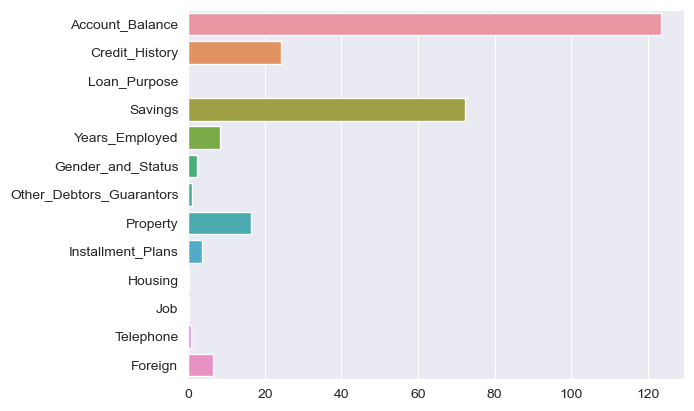

In [174]:
from sklearn.feature_selection import chi2

cpy = df.copy()

target = 'Credit_Rating'

categorical_cols = df.select_dtypes(include='category').columns

for col in categorical_cols:
    cpy[col] = cpy[col].cat.codes
    
X = cpy[categorical_cols]
y = cpy[target]

chi_scores = chi2(X,y)

sns.barplot(x=chi_scores[0], y=categorical_cols)